In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

In [7]:
df = pd.read_csv("/content/college_admissions_dataset.csv")

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
df = pd.read_csv("/content/college_admissions_dataset.csv")
print(df.head())

    GPA  Extracurriculars  Parental_Income  Hours_Studied  \
0  3.28                 0           117196              9   
1  3.47                 5           117080             18   
2  2.06                 0            48657              8   
3  3.12                 5           105181             18   
4  3.18                 0           119458              6   

   Entrance_Test_Score  Distance Internet Final_Result  
0                   61        15      Yes         Fail  
1                   41        38       No         Fail  
2                   94        39      Yes         Fail  
3                   83        15       No         Fail  
4                   84        22       No         Fail  


In [10]:
print(df.tail())

      GPA  Extracurriculars  Parental_Income  Hours_Studied  \
195  2.76                 4            89541             10   
196  2.20                 5            34996             18   
197  3.78                 3            64424             15   
198  2.63                 2           107177              9   
199  2.13                 0            32219             14   

     Entrance_Test_Score  Distance Internet Final_Result  
195                   88        33       No         Fail  
196                   57        28       No         Fail  
197                   81        27      Yes         Pass  
198                   77        10       No         Fail  
199                   42        48       No         Fail  


In [11]:
print(df.isnull().sum())

GPA                    0
Extracurriculars       0
Parental_Income        0
Hours_Studied          0
Entrance_Test_Score    0
Distance               0
Internet               0
Final_Result           0
dtype: int64


In [14]:
print(df.dtypes)

GPA                    float64
Extracurriculars         int64
Parental_Income          int64
Hours_Studied            int64
Entrance_Test_Score      int64
Distance                 int64
Internet                object
Final_Result            object
dtype: object


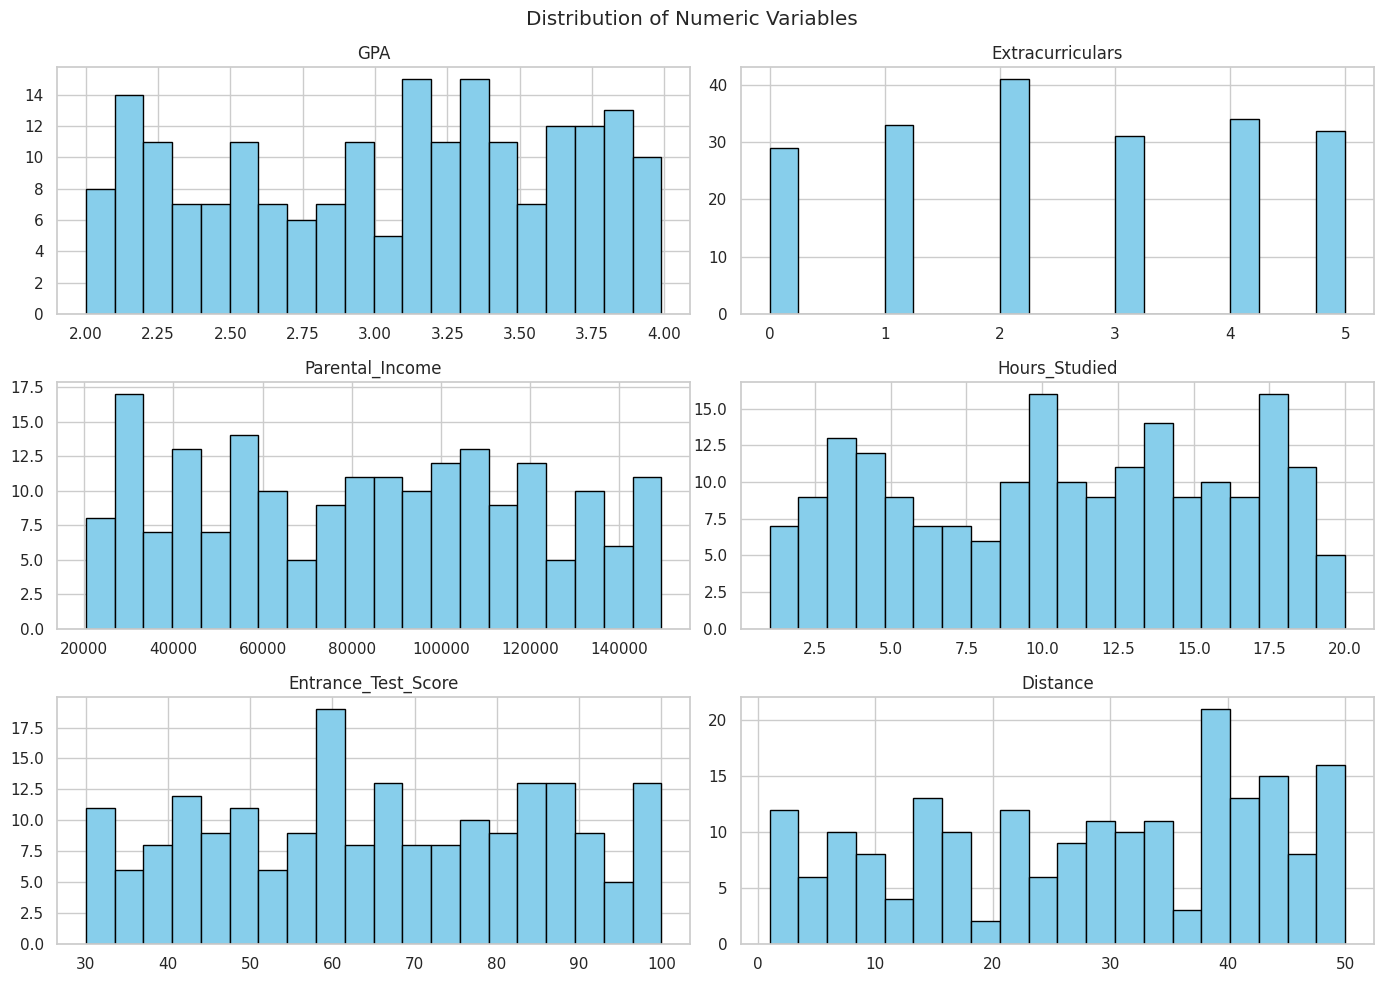

In [15]:
df.hist(bins=20, figsize=(14, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numeric Variables')
plt.tight_layout()
plt.show()


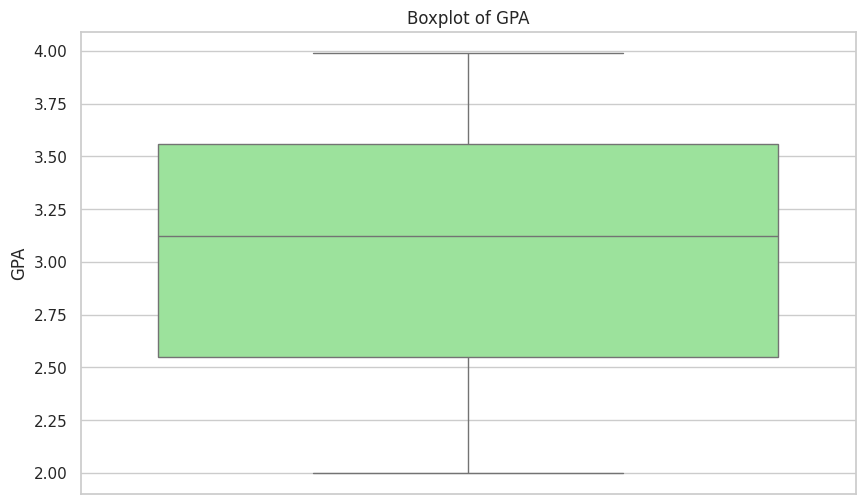

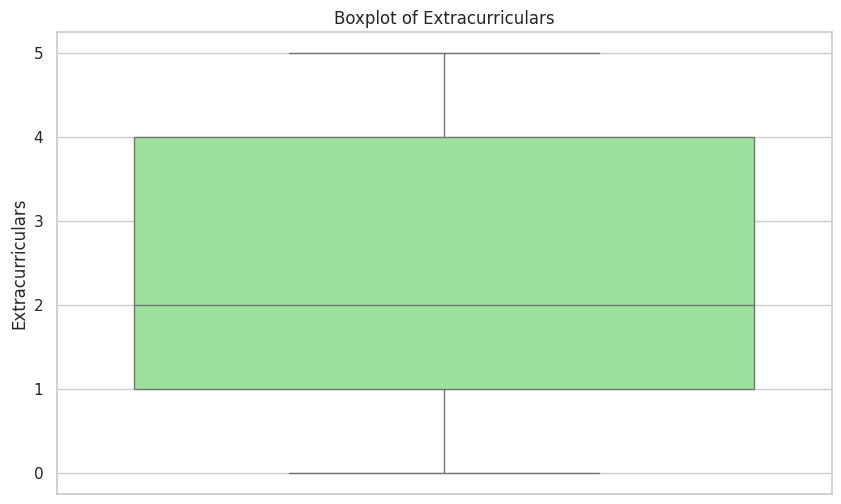

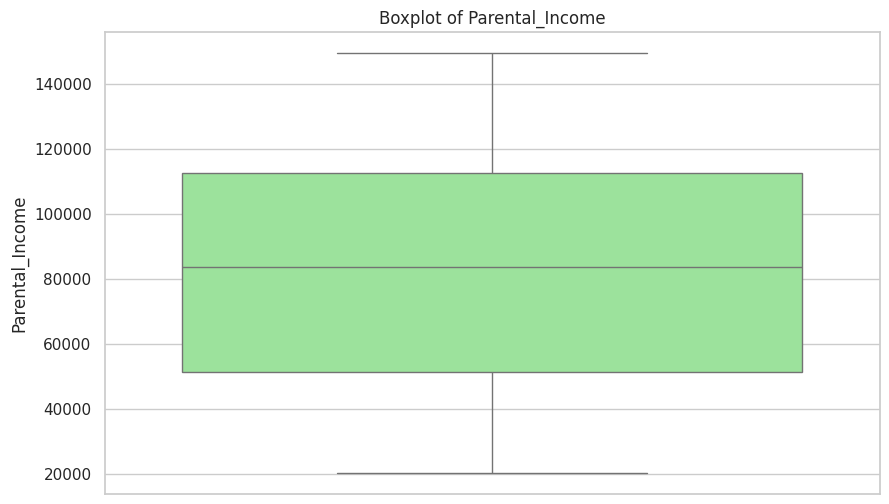

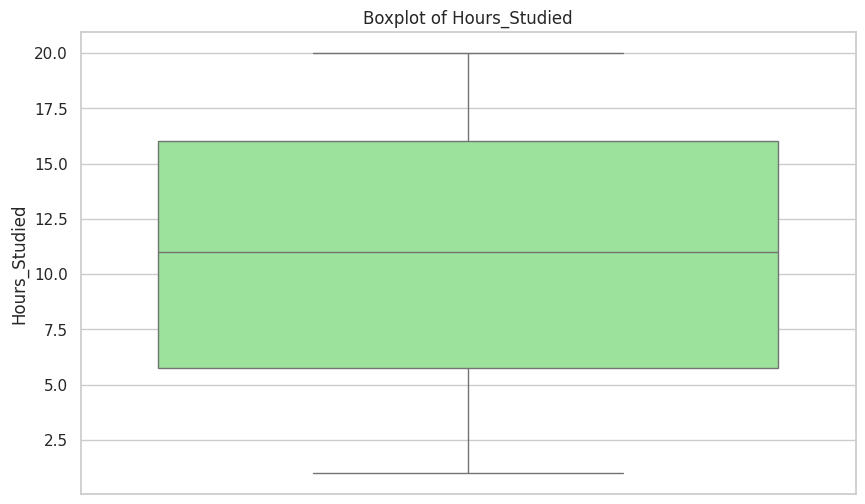

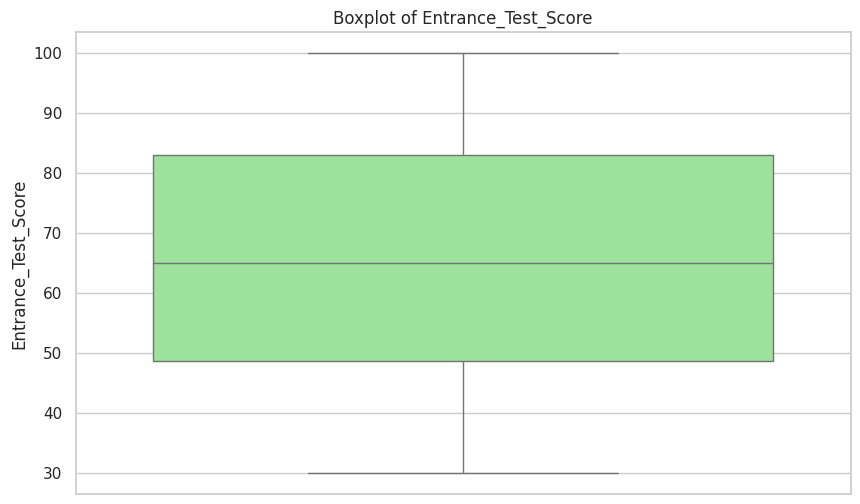

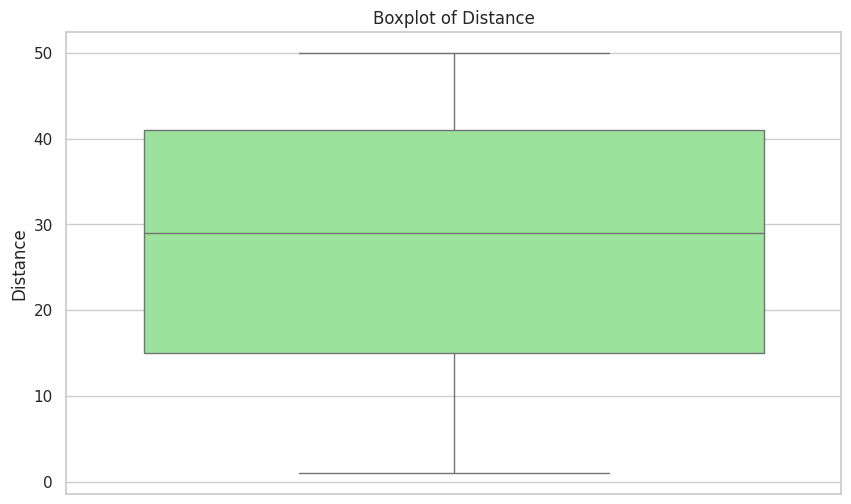

In [16]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    sns.boxplot(data=df, y=col, color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.show()

In [17]:

df['Internet'] = df['Internet'].map({'Yes': 1, 'No': 0})


X = df.drop('Final_Result', axis=1)
y = df['Final_Result']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


model = DecisionTreeClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))


Accuracy: 0.975


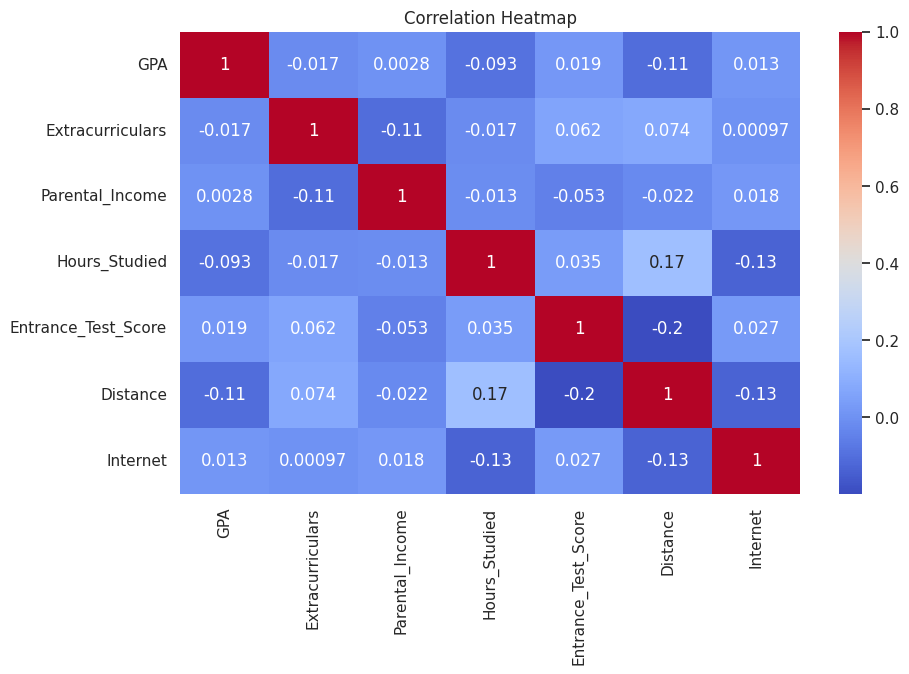

In [18]:

numeric_df = df.drop(columns=['Final_Result'])

if numeric_df['Internet'].dtype == 'object':
    numeric_df['Internet'] = numeric_df['Internet'].map({'Yes': 1, 'No': 0})


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [19]:

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_preds))

Logistic Regression Accuracy: 0.925


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [22]:
import joblib
joblib.dump(model, 'best_model.pkl')

['best_model.pkl']

In [23]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(results.head(50))


    Actual Predicted
39    Fail      Fail
166   Fail      Fail
10    Fail      Fail
5     Fail      Fail
31    Fail      Fail
170   Fail      Fail
116   Fail      Fail
3     Fail      Fail
79    Fail      Fail
106   Fail      Fail
187   Fail      Fail
67    Pass      Fail
192   Fail      Fail
77    Fail      Fail
107   Fail      Fail
69    Fail      Fail
142   Fail      Fail
30    Fail      Fail
132   Fail      Fail
29    Fail      Fail
185   Fail      Fail
158   Fail      Fail
54    Pass      Pass
48    Fail      Fail
162   Fail      Fail
127   Fail      Fail
191   Pass      Pass
71    Fail      Fail
173   Fail      Fail
156   Fail      Fail
84    Fail      Fail
111   Fail      Fail
120   Fail      Fail
124   Fail      Fail
190   Fail      Fail
178   Fail      Fail
22    Fail      Fail
33    Fail      Fail
53    Fail      Fail
97    Fail      Fail


In [24]:

# GPA, Extra Activities, Parental Income, Study Hours, Test Score, Distance, Internet
custom_student = [[7.5, 8, 400000, 12, 85, 5, 1]]


result = model.predict(custom_student)

if result[0] == 1:
    print("Prediction: The student is likely to PASS ")
else:
    print(" Prediction: The student is likely to FAIL")

 Prediction: The student is likely to FAIL


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
